# How many times drivers take more than 30 mins to arrive at the restaurant?

# Collaborators

1. Purva Sushil Firodia, pufi1846@colorado.edu
2. Renita Blessina Sathiaraj, resa2241@colorado.edu
3. Sai Yeshwanth Mekala, same1856@colorado.edu
4. Gagan Chandra Motamarri, gamo6848@colorado.edu

# Introduction

<p>In today's fast-paced world, the demand for convenience and efficiency in food delivery services has grown exponentially. One of the critical factors that determine the success of any food delivery platform is the time taken by delivery partners to pick up prepared meals from restaurants. This project report aims to delve into this pivotal aspect of the food delivery ecosystem, shedding light on the various factors that influence pickup times, their impact on customer satisfaction, and potential strategies for optimization.</p>

<p>The timely pickup of meals from restaurants is the first link in the chain of events that ultimately determines the overall delivery experience. It directly affects customer expectations and plays a significant role in shaping perceptions of the food delivery service. Whether it's a quick weekday lunch, a special dinner order, or a craving for a midnight snack, customers place a premium on the promptness of meal delivery. Hence, understanding and enhancing the efficiency of the pickup process holds paramount importance for food delivery platforms.</p>

<p>In this project report, we will explore the multifaceted nature of the pickup process. We will investigate the factors that can influence pickup times, including restaurant location, kitchen preparation times, traffic conditions, and the availability and performance of delivery partners. Through data analysis and case studies, we will highlight the real-world challenges faced by delivery platforms and restaurants in ensuring swift pickups.Furthermore, we will examine the implications of delayed pickups on customer satisfaction and retention rates. Understanding how delivery times impact the customer experience is crucial for food delivery businesses looking to establish a competitive edge in the market. High customer satisfaction not only fosters loyalty but also drives positive reviews and word-of-mouth referrals, which can significantly boost business growth.</p>


# Statement of Question
How many times drivers take more than 30 mins to arrive at the restaurant?

# Possible Sources of Bias
**1. Location Bias:**
Drivers may have biases towards or against certain delivery locations based on factors such as safety concerns, familiarity, or perceived tipping habits. This bias can lead to delays or selective acceptance of orders. \
**2. Customer Bias:**
Drivers may have biases toward specific customers. They may prioritize deliveries to customers they know or perceive as more generous with tips, potentially leaving other customers waiting longer.\
**3. Time-of-Day Bias:** 
Drivers may have preferences for working during specific times of the day or week. This can lead to bias in terms of order acceptance and delivery times, as drivers may prioritize certain shifts.\
**4. Weather Bias:** 
Weather conditions can impact driver behavior. They may be more likely to decline orders during adverse weather, leading to longer wait times for customers.\
**5. Operational Bias:** 
Bias can occur in the allocation of resources and operational decisions. For example, if a food delivery platform prioritizes profitability over service quality, it can lead to biased decisions that favor cost-cutting at the expense of timely deliveries.

# About the Dataset

Call Center Restaurant Orders Dataset

### Source link: 
[Dataset source link](https://fp20analytics.com/datasets)

This dataset contains details of the order placed by the customers. In the below cell we can find the sample of the dataset with all the columns(details of the order).

### Link to dataset on github
[Dataset](https://github.com/msaiyeshwanth/DSAF--Food-Delivery-Analysis/blob/main/call-center_restaurant-orders-mv0x6oRrEEfBDJzn.xlsx)

# Procedure:

In [1]:
import pandas as pd
df = pd.read_excel('call-center_restaurant-orders-mv0x6oRrEEfBDJzn.xlsx')
df.head()

,Date,Time customer placed order,Time order placed at restaurant,Time driver arrived at restaurant,Delivery time,Driver ID,Driver Name,Restaurant ID,Customer ID,Delivery Area,ASAP,Sub Total,Delivery fee,Service fee,Discount,Tip,Refunded amount
0,2020-01-01,02:52:12,03:00:25,03:08:09,03:35:20,9329,Christy,7263,1143515,Fremont,Yes,$21.39,$0.43,$3.83,$2.00,$1.40,$0.00
1,2020-01-01,15:58:57,17:56:45,18:24:39,18:57:01,9175,Elizabeth,7247,1136820,Hayward,Yes,$99.74,$6.05,$2.30,$2.00,$11.03,$0.00
2,2020-01-01,19:02:37,19:12:51,19:19:59,19:31:09,9051,Janet,7293,1081871,Hayward,Yes,$21.97,$2.74,$2.39,$8.00,$4.31,$0.00
3,2020-01-01,04:01:57,04:08:18,04:13:02,04:37:57,9389,Jacquelyn,7046,1128255,Union City,Yes,$32.79,$0.12,$2.55,$2.00,$8.55,$0.00
4,2020-01-01,23:46:38,23:49:32,23:54:29,00:37:15,9187,Lauren,7385,1051183,Hayward,Yes,$67.56,$3.77,$3.35,$2.00,$8.82,$0.00


## Renaming the columns for consistency

In [2]:
df.columns = ['DATE', 'TIME_CUSTOMER_PLACED_ORDER', 'TIME_ORDER_PLACED_AT_RESTAURANT', 
              'TIME_DRIVER_ARRIVED_AT_RESTAURANT', 'DELIVERY_TIME', 'DRIVER_ID',
              'DRIVER_NAME', 'RESTAURANT_ID', 'CUSTOMER_ID', 'DELIVERY_AREA', 'ASAP',
              'SUB_TOTAL', 'DELIVERY_FEE', 'SERVICE_FEE', 'DISCOUNT', 'TIP', 
              'REFUNDED_AMOUNT']
df.head()

,DATE,TIME_CUSTOMER_PLACED_ORDER,TIME_ORDER_PLACED_AT_RESTAURANT,TIME_DRIVER_ARRIVED_AT_RESTAURANT,DELIVERY_TIME,DRIVER_ID,DRIVER_NAME,RESTAURANT_ID,CUSTOMER_ID,DELIVERY_AREA,ASAP,SUB_TOTAL,DELIVERY_FEE,SERVICE_FEE,DISCOUNT,TIP,REFUNDED_AMOUNT
0,2020-01-01,02:52:12,03:00:25,03:08:09,03:35:20,9329,Christy,7263,1143515,Fremont,Yes,$21.39,$0.43,$3.83,$2.00,$1.40,$0.00
1,2020-01-01,15:58:57,17:56:45,18:24:39,18:57:01,9175,Elizabeth,7247,1136820,Hayward,Yes,$99.74,$6.05,$2.30,$2.00,$11.03,$0.00
2,2020-01-01,19:02:37,19:12:51,19:19:59,19:31:09,9051,Janet,7293,1081871,Hayward,Yes,$21.97,$2.74,$2.39,$8.00,$4.31,$0.00
3,2020-01-01,04:01:57,04:08:18,04:13:02,04:37:57,9389,Jacquelyn,7046,1128255,Union City,Yes,$32.79,$0.12,$2.55,$2.00,$8.55,$0.00
4,2020-01-01,23:46:38,23:49:32,23:54:29,00:37:15,9187,Lauren,7385,1051183,Hayward,Yes,$67.56,$3.77,$3.35,$2.00,$8.82,$0.00


## Removing the Dollar sign 

In [3]:
df['SUB_TOTAL'] = df['SUB_TOTAL'].str.replace('$', '')
df['DELIVERY_FEE'] = df['DELIVERY_FEE'].str.replace('$', '')
df['SERVICE_FEE'] = df['SERVICE_FEE'].str.replace('$', '')
df['DISCOUNT'] = df['DISCOUNT'].str.replace('$', '')
df['TIP'] = df['TIP'].str.replace('$', '')
df['REFUNDED_AMOUNT'] = df['REFUNDED_AMOUNT'].str.replace('$', '')

In [4]:
df.head()

,DATE,TIME_CUSTOMER_PLACED_ORDER,TIME_ORDER_PLACED_AT_RESTAURANT,TIME_DRIVER_ARRIVED_AT_RESTAURANT,DELIVERY_TIME,DRIVER_ID,DRIVER_NAME,RESTAURANT_ID,CUSTOMER_ID,DELIVERY_AREA,ASAP,SUB_TOTAL,DELIVERY_FEE,SERVICE_FEE,DISCOUNT,TIP,REFUNDED_AMOUNT
0,2020-01-01,02:52:12,03:00:25,03:08:09,03:35:20,9329,Christy,7263,1143515,Fremont,Yes,21.39,0.43,3.83,2.00,1.40,0.00
1,2020-01-01,15:58:57,17:56:45,18:24:39,18:57:01,9175,Elizabeth,7247,1136820,Hayward,Yes,99.74,6.05,2.30,2.00,11.03,0.00
2,2020-01-01,19:02:37,19:12:51,19:19:59,19:31:09,9051,Janet,7293,1081871,Hayward,Yes,21.97,2.74,2.39,8.00,4.31,0.00
3,2020-01-01,04:01:57,04:08:18,04:13:02,04:37:57,9389,Jacquelyn,7046,1128255,Union City,Yes,32.79,0.12,2.55,2.00,8.55,0.00
4,2020-01-01,23:46:38,23:49:32,23:54:29,00:37:15,9187,Lauren,7385,1051183,Hayward,Yes,67.56,3.77,3.35,2.00,8.82,0.00


In [5]:
df.shape

(72314, 17)

# Dealing missing values

In [6]:
df.isna().sum()

DATE                                     0
TIME_CUSTOMER_PLACED_ORDER               0
TIME_ORDER_PLACED_AT_RESTAURANT        160
TIME_DRIVER_ARRIVED_AT_RESTAURANT    18124
DELIVERY_TIME                            0
DRIVER_ID                                0
DRIVER_NAME                              0
RESTAURANT_ID                            0
CUSTOMER_ID                              0
DELIVERY_AREA                            0
ASAP                                     0
SUB_TOTAL                                0
DELIVERY_FEE                             0
SERVICE_FEE                              0
DISCOUNT                                 0
TIP                                      0
REFUNDED_AMOUNT                          0
dtype: int64

In [7]:
df=df.dropna()

In [8]:
df.shape

(54098, 17)

In [9]:
df.isna().sum()

DATE                                 0
TIME_CUSTOMER_PLACED_ORDER           0
TIME_ORDER_PLACED_AT_RESTAURANT      0
TIME_DRIVER_ARRIVED_AT_RESTAURANT    0
DELIVERY_TIME                        0
DRIVER_ID                            0
DRIVER_NAME                          0
RESTAURANT_ID                        0
CUSTOMER_ID                          0
DELIVERY_AREA                        0
ASAP                                 0
SUB_TOTAL                            0
DELIVERY_FEE                         0
SERVICE_FEE                          0
DISCOUNT                             0
TIP                                  0
REFUNDED_AMOUNT                      0
dtype: int64

# Defining Function to calculate time difference in seconds

In [10]:
def calculate_time_difference(row):
    order_time = row['TIME_ORDER_PLACED_AT_RESTAURANT']
    driver_time = row['TIME_DRIVER_ARRIVED_AT_RESTAURANT']
    
    time_diff_seconds = (driver_time.hour * 3600 + driver_time.minute * 60 + driver_time.second) - \
                        (order_time.hour * 3600 + order_time.minute * 60 + order_time.second)
    
    return time_diff_seconds

# Calculating time taken by the drive to arrive at the restaurant in Seconds and Minutes and creating new columns

In [11]:
df['TIME_ORDER_PLACED_AT_RESTAURANT'] = pd.to_datetime(df['TIME_ORDER_PLACED_AT_RESTAURANT'], format='%H:%M:%S').dt.time
df['TIME_DRIVER_ARRIVED_AT_RESTAURANT'] = pd.to_datetime(df['TIME_DRIVER_ARRIVED_AT_RESTAURANT'], format='%H:%M:%S').dt.time

df['TIME_TAKEN_BY_DRIVER_TO_ARRIVE_AT_THE_RESTAURANT_SECONDS'] = df.apply(calculate_time_difference, axis=1)

df['TIME_TAKEN_BY_DRIVER_TO_ARRIVE_AT_THE_RESTAURANT_MINUTES'] = df['TIME_TAKEN_BY_DRIVER_TO_ARRIVE_AT_THE_RESTAURANT_SECONDS'] / 60

df[['TIME_ORDER_PLACED_AT_RESTAURANT', 'TIME_DRIVER_ARRIVED_AT_RESTAURANT', 'TIME_TAKEN_BY_DRIVER_TO_ARRIVE_AT_THE_RESTAURANT_SECONDS', 'TIME_TAKEN_BY_DRIVER_TO_ARRIVE_AT_THE_RESTAURANT_MINUTES']].head()

,TIME_ORDER_PLACED_AT_RESTAURANT,TIME_DRIVER_ARRIVED_AT_RESTAURANT,TIME_TAKEN_BY_DRIVER_TO_ARRIVE_AT_THE_RESTAURANT_SECONDS,TIME_TAKEN_BY_DRIVER_TO_ARRIVE_AT_THE_RESTAURANT_MINUTES
0,03:00:25,03:08:09,464,7.733333
1,17:56:45,18:24:39,1674,27.900000
2,19:12:51,19:19:59,428,7.133333
3,04:08:18,04:13:02,284,4.733333
4,23:49:32,23:54:29,297,4.950000


# Removing negative values

In [12]:
df = df[df['TIME_TAKEN_BY_DRIVER_TO_ARRIVE_AT_THE_RESTAURANT_MINUTES'] >= 0]

In [13]:
df["TIME_TAKEN_BY_DRIVER_TO_ARRIVE_AT_THE_RESTAURANT_MINUTES"].describe()

count    51452.000000
mean        23.199534
std         28.935337
min          0.016667
25%         11.000000
50%         17.475000
75%         28.750000
max       1430.566667
Name: TIME_TAKEN_BY_DRIVER_TO_ARRIVE_AT_THE_RESTAURANT_MINUTES, dtype: float64

# Resetting the Index

In [14]:
df.reset_index(drop=True, inplace=True)

# Visualization and Analysis

## 1. Line Plot - Time taken by driver to arrive at the restaurant in minutes for each record/row

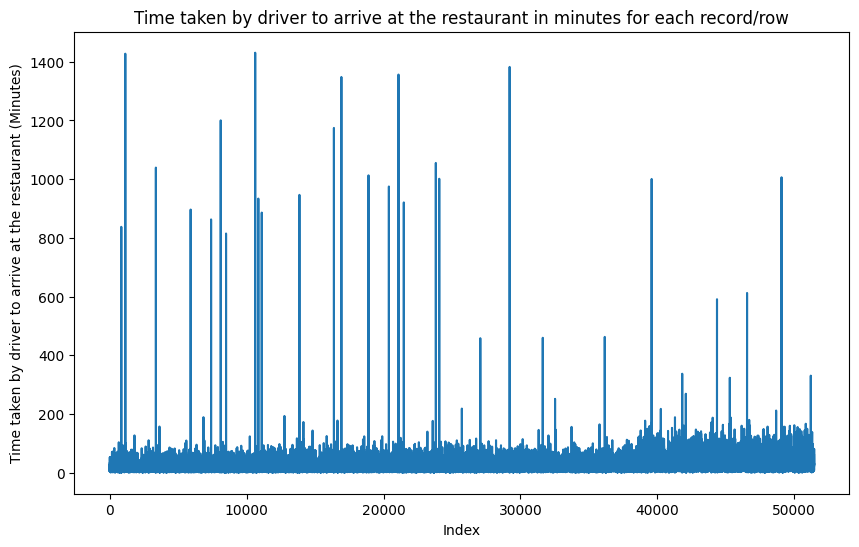

In [15]:
import matplotlib.pyplot as plt
!pip3 install seaborn
import seaborn as sns
plt.figure(figsize=(10, 6))
plt.plot(df["TIME_TAKEN_BY_DRIVER_TO_ARRIVE_AT_THE_RESTAURANT_MINUTES"])
plt.xlabel('Index')
plt.ylabel('Time taken by driver to arrive at the restaurant (Minutes)')
plt.title('Time taken by driver to arrive at the restaurant in minutes for each record/row')
plt.show()

## 2. Histogram - Distribution of Time taken by driver to arrive at the restaurant

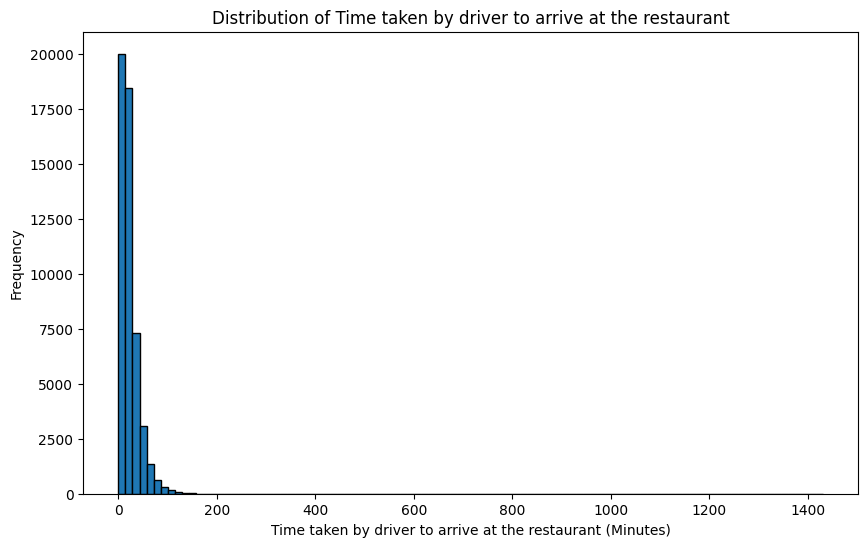

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(df['TIME_TAKEN_BY_DRIVER_TO_ARRIVE_AT_THE_RESTAURANT_MINUTES'], bins=100, edgecolor='k')
plt.xlabel('Time taken by driver to arrive at the restaurant (Minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Time taken by driver to arrive at the restaurant')
plt.show()

### Histogram with time in range of 0-100. We did not consider values after that range as there are very few values.

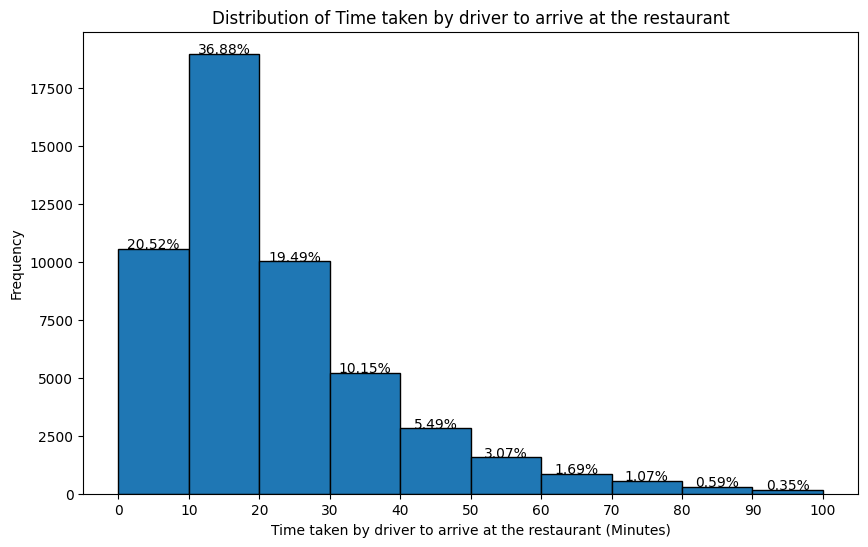

In [17]:
bins = range(0, 110, 10)
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df['TIME_TAKEN_BY_DRIVER_TO_ARRIVE_AT_THE_RESTAURANT_MINUTES'], bins=bins, edgecolor='k')

total_count = len(df)
for i, patch in enumerate(patches):
    percentage = (n[i] / total_count) * 100
    plt.text(patch.get_x() + patch.get_width() / 2, patch.get_height() + 5, f'{percentage:.2f}%', ha='center')

plt.xlabel('Time taken by driver to arrive at the restaurant (Minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Time taken by driver to arrive at the restaurant')
plt.xticks(bins)

plt.show()

# 3. Kernel Density Estimation 

The resulting KDE graph displays a smooth estimate of the probability density function (PDF) for the dataset. Here are some key points for interpretation:

### Density: 
The y-axis represents the estimated density of the data at various points along the x-axis.
### Peaks: 
Peaks in the KDE plot correspond to modes or clusters in the data.
### Spread: 
The width of the KDE curve at any point indicates the level of spread or uncertainty in the data.

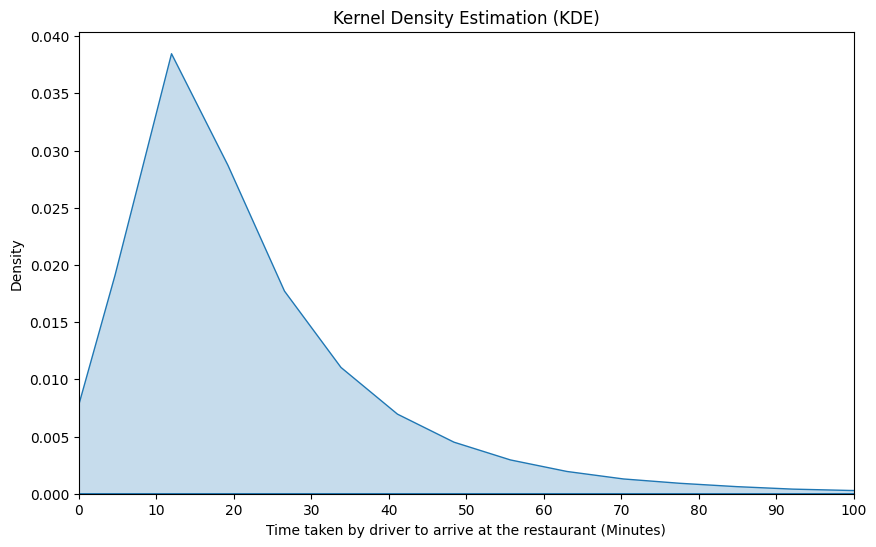

In [18]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['TIME_TAKEN_BY_DRIVER_TO_ARRIVE_AT_THE_RESTAURANT_MINUTES'], fill=True)
plt.xlabel('Time taken by driver to arrive at the restaurant (Minutes)')
plt.ylabel('Density')
plt.title('Kernel Density Estimation (KDE)')
plt.xticks(range(0, 101, 10)) 
plt.xlim(0, 100)
plt.show()

In [19]:
percentage_arriving_after_30_minutes = (len(df[df['TIME_TAKEN_BY_DRIVER_TO_ARRIVE_AT_THE_RESTAURANT_MINUTES'] > 30]) / len(df)) * 100
percentage_arriving_after_30_minutes = round(percentage_arriving_after_30_minutes, 2)
percentage_arriving_after_30_minutes

23.09

# Conclusion
<p>To conclude, this project report aims to provide valuable insights into the intricate dynamics of meal pickups in the food delivery industry. By gaining a comprehensive understanding of the challenges and opportunities in this critical phase of the delivery process, food delivery platforms and restaurants can make informed decisions, implement effective strategies, and ultimately offer a more efficient and satisfying experience to their customers.</p>
<p>After performing insighful ananlysis on the data we also conclude that 23.09% of the time drivers arrive 30 minutes late for food or order pick up from a restaurant after food is being prepared and ready for pick up.</p>